# Seasonal patterns of prices

In [1]:
# Import all necessary libraries

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import missingno as msno
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model, metrics

In [2]:
# Read in the dataset
calendar_df = pd.read_csv('/content/drive/MyDrive/calendar.csv')

## Data Cleaning and Feature Engineering

In [3]:
# Data Understanding
calendar_df.shape

(2554278, 7)

In [4]:
calendar_df.head()


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2023-03-09,f,$69.00,$69.00,3.0,1125.0
1,2818,2023-03-10,f,$69.00,$69.00,3.0,1125.0
2,2818,2023-03-11,f,$69.00,$69.00,3.0,1125.0
3,2818,2023-03-12,f,$69.00,$69.00,3.0,1125.0
4,2818,2023-03-13,t,$69.00,$69.00,3.0,1125.0


In [5]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554278 entries, 0 to 2554277
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 136.4+ MB


In [6]:
# Print number of missing values
calendar_df.isna().sum()

listing_id          0
date                0
available           0
price             759
adjusted_price    759
minimum_nights      2
maximum_nights      2
dtype: int64

In [7]:
# Print description of DataFrame
calendar_df.describe()

,listing_id,minimum_nights,maximum_nights
count,2.554278e+06,2.554276e+06,2.554276e+06
mean,1.867998e+17,4.261859e+00,6.109487e+05
std,3.138151e+17,1.942372e+01,3.619949e+07
min,2.818000e+03,1.000000e+00,1.000000e+00
25%,1.578502e+07,2.000000e+00,3.000000e+01
50%,3.534298e+07,3.000000e+00,3.650000e+02
75%,5.822990e+17,4.000000e+00,1.125000e+03
max,8.427546e+17,1.001000e+03,2.147484e+09


In [8]:
# Remove $ and convert price to float
calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_df['adjusted_price'] = calendar_df['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2023-03-09,f,69.0,69.0,3.0,1125.0
1,2818,2023-03-10,f,69.0,69.0,3.0,1125.0
2,2818,2023-03-11,f,69.0,69.0,3.0,1125.0
3,2818,2023-03-12,f,69.0,69.0,3.0,1125.0
4,2818,2023-03-13,t,69.0,69.0,3.0,1125.0


In [9]:
# Find number of unique values in room_type column
calendar_df['available'].unique()

array(['f', 't'], dtype=object)

In [10]:
# Create a label encoder object
le = LabelEncoder()

# Fit the label encoder to the categorical column
calendar_df['available'] = le.fit_transform(calendar_df['available'])
calendar_df['available'] = calendar_df['available'].astype(bool).astype(int)

# Print the updated dataframe with the categorical column in integer format
calendar_df.head()


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2023-03-09,0,69.0,69.0,3.0,1125.0
1,2818,2023-03-10,0,69.0,69.0,3.0,1125.0
2,2818,2023-03-11,0,69.0,69.0,3.0,1125.0
3,2818,2023-03-12,0,69.0,69.0,3.0,1125.0
4,2818,2023-03-13,1,69.0,69.0,3.0,1125.0


In [11]:
# Checking for duplicate entries or inconsistent data
duplicates = calendar_df[calendar_df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [listing_id, date, available, price, adjusted_price, minimum_nights, maximum_nights]
Index: []


In [12]:
# Convert date to proper format
calendar_df[['Year', 'Month', 'Date']] = calendar_df['date'].astype(str).str.split('-', n=2, expand=True)

#Add Day to every row
calendar_df['date'] = pd.to_datetime(calendar_df['date'], errors='coerce')
calendar_df['Day'] = calendar_df['date'].dt.day_name()


In [13]:
# Removing missing values
calendar_df.dropna(subset=['price', 'adjusted_price'], inplace=True)
calendar_df.dropna(subset=['minimum_nights', 'maximum_nights'], inplace=True)

In [14]:
calendar_df.dropna(subset=['price', 'adjusted_price'], inplace=True)


In [15]:

lookupDay = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
calendar_df['day_num'] = calendar_df['Day'].apply(lambda x: lookupDay[x])
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Year,Month,Date,Day,day_num
0,2818,2023-03-09,0,69.0,69.0,3.0,1125.0,2023,03,09,Thursday,4
1,2818,2023-03-10,0,69.0,69.0,3.0,1125.0,2023,03,10,Friday,5
2,2818,2023-03-11,0,69.0,69.0,3.0,1125.0,2023,03,11,Saturday,6
3,2818,2023-03-12,0,69.0,69.0,3.0,1125.0,2023,03,12,Sunday,7
4,2818,2023-03-13,1,69.0,69.0,3.0,1125.0,2023,03,13,Monday,1


In [16]:
# Assign Season to every entry
lookup = {
    '01': 'Winter',
    '02': 'Spring',
    '03': 'Spring',
    '04': 'Spring',
    '05': 'Summer',
    '06': 'Summer',
    '07': 'Summer',
    '08': 'Autumn',
    '09': 'Autumn',
    '10': 'Autumn',
    '11': 'Winter',
    '12': 'Winter'
}
calendar_df['season'] = calendar_df['Month'].apply(lambda x: lookup[x])
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Year,Month,Date,Day,day_num,season
0,2818,2023-03-09,0,69.0,69.0,3.0,1125.0,2023,03,09,Thursday,4,Spring
1,2818,2023-03-10,0,69.0,69.0,3.0,1125.0,2023,03,10,Friday,5,Spring
2,2818,2023-03-11,0,69.0,69.0,3.0,1125.0,2023,03,11,Saturday,6,Spring
3,2818,2023-03-12,0,69.0,69.0,3.0,1125.0,2023,03,12,Sunday,7,Spring
4,2818,2023-03-13,1,69.0,69.0,3.0,1125.0,2023,03,13,Monday,1,Spring


In [17]:
lookupNum = {
    '01': 4,
    '02': 1,
    '03': 1,
    '04': 1,
    '05': 2,
    '06': 2,
    '07': 2,
    '08': 3,
    '09': 3,
    '10': 3,
    '11': 4,
    '12': 4
}

calendar_df['season_num'] = calendar_df['Month'].apply(lambda x: lookupNum[x])

In [18]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Year,Month,Date,Day,day_num,season,season_num
0,2818,2023-03-09,0,69.0,69.0,3.0,1125.0,2023,03,09,Thursday,4,Spring,1
1,2818,2023-03-10,0,69.0,69.0,3.0,1125.0,2023,03,10,Friday,5,Spring,1
2,2818,2023-03-11,0,69.0,69.0,3.0,1125.0,2023,03,11,Saturday,6,Spring,1
3,2818,2023-03-12,0,69.0,69.0,3.0,1125.0,2023,03,12,Sunday,7,Spring,1
4,2818,2023-03-13,1,69.0,69.0,3.0,1125.0,2023,03,13,Monday,1,Spring,1


## Data Visualization and Analysis

Average price by season


In [19]:
seasonDF = calendar_df.groupby(['season']).price.mean()
seasonDF = seasonDF.reset_index()
seasonDF = seasonDF.rename(columns={'price':'Average Price'})
seasonDF

,season,Average Price
0,Autumn,251.408176
1,Spring,258.998627
2,Summer,242.015976
3,Winter,247.757050


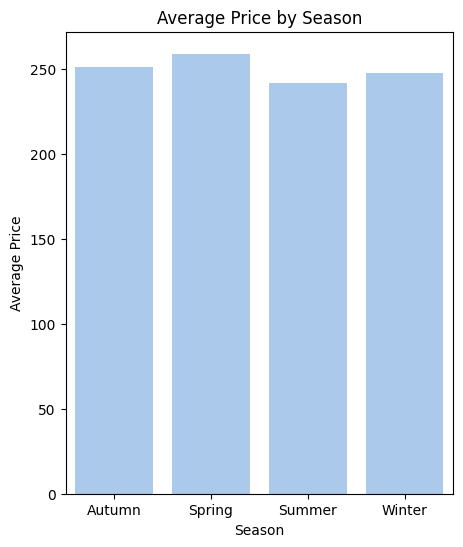

In [20]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(5,6))

# Create the bar plot with a color palette
sns.barplot(x='season', y='Average Price', data=seasonDF, color=sns.color_palette('pastel')[0], ax=ax)

# Add x-axis and y-axis labels
ax.set_xlabel('Season')
ax.set_ylabel('Average Price')

# Add a title to the plot
ax.set_title('Average Price by Season')

# Show the plot
plt.show()

Average price by Month

In [21]:
monthDF = calendar_df.groupby(['Month']).price.mean()
monthDF = monthDF.reset_index()
monthDF = monthDF.rename(columns={'price':'Average Price'})
lookupMonth = {
    '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}
monthDF['Month'] = monthDF['Month'].apply(lambda x: lookupMonth[x])
monthDF

,Month,Average Price
0,January,259.333143
1,February,285.513225
2,March,243.324878
3,April,249.034568
4,May,243.197132
5,June,239.026433
6,July,243.727925
7,August,245.934967
8,September,250.801047
9,October,257.467292


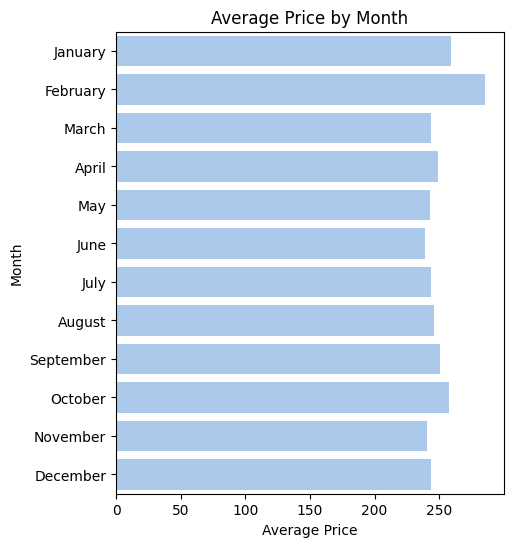

In [22]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(5,6))

# Create the bar plot with a color palette
sns.barplot(x='Average Price', y='Month', data=monthDF, color=sns.color_palette('pastel')[0], orient='h', ax=ax)

# Add x-axis and y-axis labels
ax.set_xlabel('Average Price')
ax.set_ylabel('Month')

# Add a title to the plot
ax.set_title('Average Price by Month')

# Show the plot
plt.show()

Average price by Day


In [23]:
dayDF = calendar_df.groupby(['Day']).price.mean()
dayDF = dayDF.reset_index()
dayDF = dayDF.rename(columns={'price':'Average Price'})
lookupDayNum = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6,
}
dayDF['day num'] = dayDF['Day'].apply(lambda x: lookupDayNum[x])
dayDF = dayDF.sort_values(by=['day num'])
dayDF

,Day,Average Price,day num
1,Monday,246.567917,0
5,Tuesday,246.457925,1
6,Wednesday,246.643025,2
4,Thursday,248.498792,3
0,Friday,256.794463,4
2,Saturday,256.893177,5
3,Sunday,247.859589,6


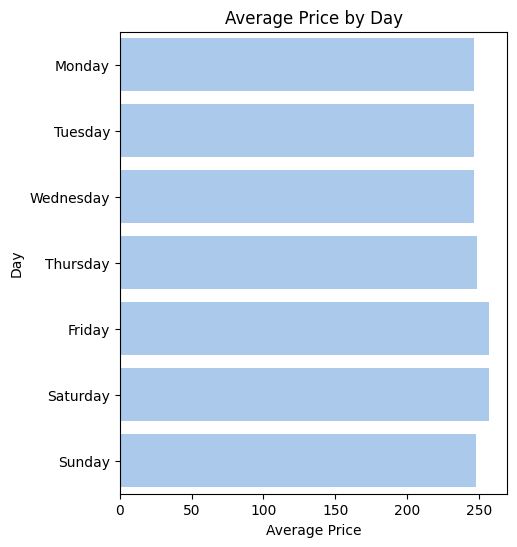

In [24]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(5,6))

# Create the bar plot with a color palette
sns.barplot(x='Average Price', y='Day', data=dayDF, color=sns.color_palette('pastel')[0], orient='h', ax=ax)

# Add x-axis and y-axis labels
ax.set_xlabel('Average Price')
ax.set_ylabel('Day')

# Add a title to the plot
ax.set_title('Average Price by Day')

# Show the plot
plt.show()

Analysis of average price during the holidays


In [25]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import holidays

holidays_pandas = calendar().holidays()
holidays_us = holidays.Netherlands()

In [26]:
calendar_df['holiday'] = calendar_df['date'].isin(holidays_pandas)
calendar_df['holiday name'] = calendar_df['date'].apply(lambda x: holidays_us.get(x))

In [27]:

holidayDf=calendar_df.groupby('holiday name').price.mean()
holidayDf=holidayDf.reset_index()
holidayDf=holidayDf.sort_values('price',ascending=[1])
holidayDf = holidayDf.rename(columns={'price':'Average Price'})


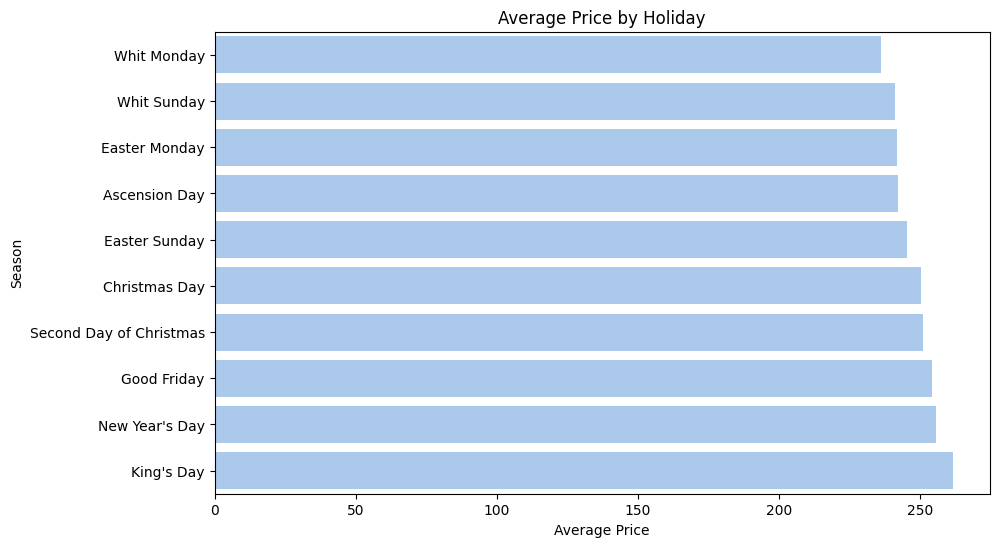

In [28]:
holidayDf

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Create the bar plot with a color palette
sns.barplot(y='holiday name', x='Average Price', data=holidayDf, color=sns.color_palette('pastel')[0], orient='h', ax=ax)

# Add x-axis and y-axis labels
ax.set_ylabel('Season')
ax.set_xlabel('Average Price')

# Add a title to the plot
ax.set_title('Average Price by Holiday')

# Show the plot
plt.show()


Seasonal trends in prices

<Axes: xlabel='season', ylabel='price'>

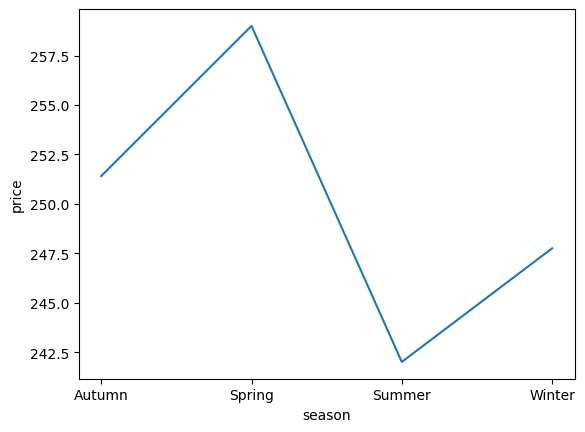

In [30]:
# Create a new DataFrame with the average price by season
season_df = calendar_df.groupby('season')['price'].mean().reset_index()

# Plot the line chart
sns.lineplot(data=season_df, x='season', y='price')

In [31]:
calendar_df.to_csv('calendar_cleaned.csv', index=False)


In [32]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2553517 entries, 0 to 2554277
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       int64         
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
 7   Year            object        
 8   Month           object        
 9   Date            object        
 10  Day             object        
 11  day_num         int64         
 12  season          object        
 13  season_num      int64         
 14  holiday         bool          
 15  holiday name    object        
dtypes: bool(1), datetime64[ns](1), float64(4), int64(4), object(6)
memory usage: 314.1+ MB
